<h2><center><font color = "red">Cleaning</font></center></h2>

<h3><font color = "green">Load Necessary Libraries</font></h3>

In [1]:
%matplotlib inline
# important libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import warnings
import os

# display all features
pd.set_option("display.max_columns", None)

# matplotlib settings
mpl.rc('axes', labelsize=15)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

# remove the top and right axis
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

warnings.filterwarnings(action="ignore")

<h3><font color = "green">Load and Display Dataset</font></h3>

In [2]:
DATASETS_file = "../data"
csv_file = "US_Accidents_Dec20_updated.csv"

csv_file_path = os.path.join(DATASETS_file, csv_file)
accidents_df = pd.read_csv(filepath_or_buffer=csv_file_path)

print(f"accidents_df shape:\t{accidents_df.shape}")
accidents_df.head()

accidents_df shape:	(1516064, 47)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


<h2><center><font color = "red">Data Cleaning</font></center></h2>

<h3><font color = "green">Check for Missing Values</font></h3>

In [3]:
missing_cols = [col for col in accidents_df.columns if accidents_df[col].isna().sum() > 0]
missing_data = accidents_df[missing_cols].isna().sum()

missing_data_df = pd.DataFrame(data={"features": missing_data.index,
                                     "total_missing": missing_data.values,
                                     "percentage": (missing_data.values/accidents_df.shape[0])*100}).sort_values(by="percentage", 
                                                                                                                 ascending=False).reset_index().drop(labels="index", axis=1)

missing_data_df


,features,total_missing,percentage
0,Number,1046095,69.000715
1,Precipitation(in),510549,33.675953
2,Wind_Chill(F),449316,29.637007
3,Wind_Speed(mph),128862,8.499773
4,Humidity(%),45509,3.001786
5,Visibility(mi),44211,2.916170
6,Weather_Condition,44007,2.902714
7,Temperature(F),43033,2.838469
8,Wind_Direction,41858,2.760965
9,Pressure(in),36274,2.392643


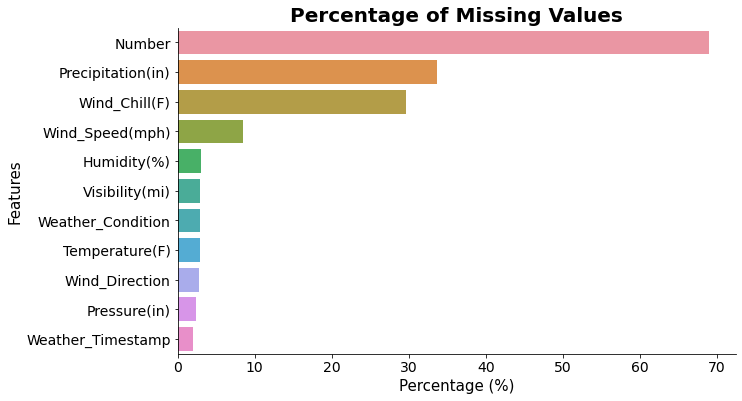

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_data_df[:11], x="percentage", y="features")
plt.title(label="Percentage of Missing Values", fontdict={"fontsize": 20, "weight": "bold"})
plt.xlabel(xlabel="Percentage (%)", fontdict={"fontsize": 15})
plt.ylabel(ylabel="Features", fontdict={"fontsize": 15})
plt.show()

As we can see that the feature "Number" has about 70% of its values missing, and also the feature "Street" describes the same road as the "Number", but with a name. So we can easily drop the feature "Number" and we can keep the "Street" name for describing the road.

In [5]:
accidents_df.drop(labels="Number", axis=1, inplace=True)

Also, the features "Wind_Speed(mph)", Humidity(%)", "Visibility(mi)", "Weather_Condition", "Temperature(F)", "Wind_Direction", "Pressure(in)", "Weather_Timestamp","Airport_Code", "Timezone", "Zipcode", "City", "Sunrise_Sunset", "Civil_Twilight", "Nautical_Twilight", and "Astronomical_Twilight" have less than 10%  missing values so we can easily drop these rows without affecting the dataset's information.

In [6]:
features = ["Wind_Speed(mph)", "Humidity(%)", "Visibility(mi)", "Weather_Condition", "Temperature(F)", 
            "Wind_Direction", "Pressure(in)", "Weather_Timestamp","Airport_Code", "Timezone", "Zipcode", 
            "City", "Sunrise_Sunset", "Civil_Twilight", "Nautical_Twilight","Astronomical_Twilight"]

accidents_df.dropna(subset=features, axis=0, inplace=True)

<h3><font color = "green">Check Cardinality of Categorical Features and non Important Features</font></h3>

In [7]:
# Numerical and categorical lists of features
num_cols = [col for col in accidents_df.columns if accidents_df[col].dtype != object]
cat_cols = [col for col in accidents_df.columns if accidents_df[col].dtype == object]

In [8]:
# Check cardinality
accidents_copy = accidents_df.copy()[cat_cols]
cardinality_df = pd.DataFrame(data={"Features": accidents_copy.columns, "Cardinality": accidents_copy.nunique()}).set_index("Features")
cardinality_df

,Cardinality
Features,
ID,1370980
Start_Time,940639
End_Time,1057471
Description,488027
Street,88394
Side,2
City,10241
County,1647
State,49


From above we can observe that the feature "Country" has only one entry - USA, which is quite apparent since we are dealing with the USA's dataset. Hence, this feature will be deleted. Also, we will drop "Description" feature because we are not going to perform NLP or any text classification.

In [9]:
accidents_df.drop(labels=["Country", "Description"], axis=1, inplace=True)

In [10]:
# Save the cleaned dataset
accidents_df.to_csv("accidents_df_cleaned.csv", index=False)